<a href="https://colab.research.google.com/github/ernestoruizds/DS_C3_SC1_ERNESTO_RUIZ_SANCHEZ/blob/main/DS_C6_SC2_ERNESTO_RUIZ_SANCHEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

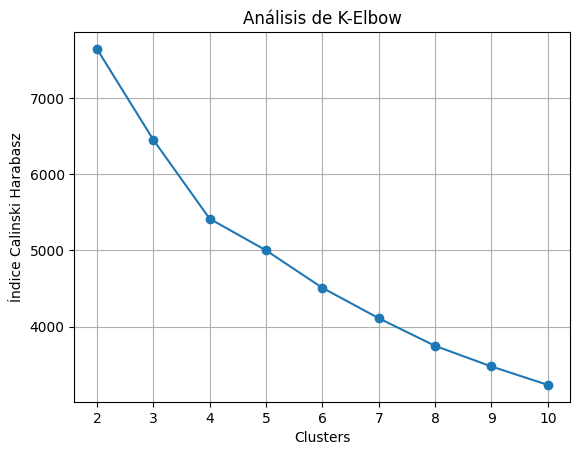

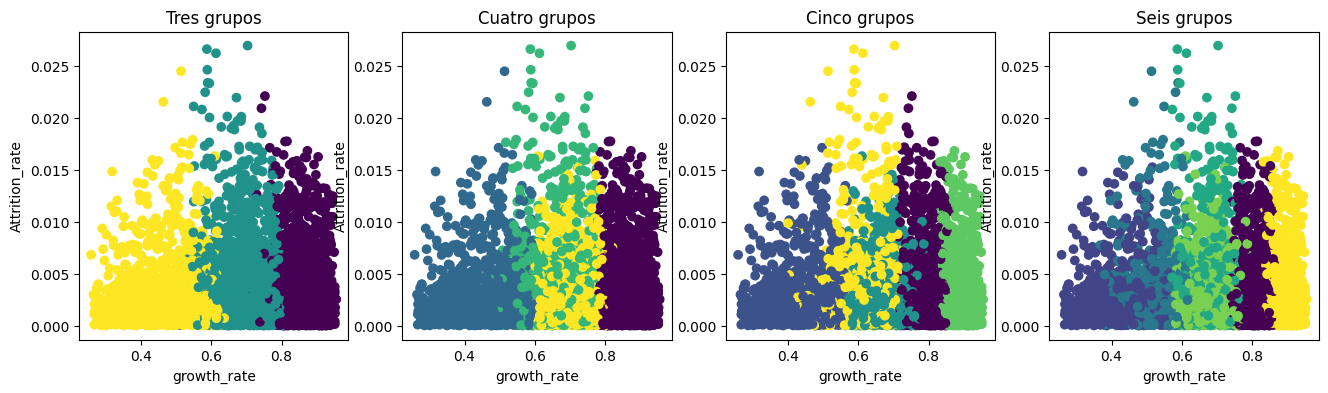

Grupo0 contiene 2433 empleados.
Grupo1 contiene 1538 empleados.
Grupo2 contiene 1307 empleados.
Grupo3 contiene 1722 empleados.


In [99]:
# 1. Genera una libreta en Google Colab para resolver el reto con scripts de Python.
# 2. Descarga el archivo en la plataforma kaggle.com

# Se importa las librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from google.colab import drive
from sklearn import linear_model
#from sklearn.decomposition import PCA
from sklearn import cluster, metrics
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, normalize

drive.mount('/content/drive', force_remount=True)

# 3. Abre el archivo Train.csv para conocer su estructura y familiarizarse con la información contenida en él.
# 4. Crea un DataFrame en pandas para el archivo.
df = pd.read_csv("/content/drive/MyDrive/M16/Reto/Train.csv")

# Transforma los datos según las características de las variables:
# Puede usar diferentes métodos de transformación, como OrdinalEncoder, OneHotEncoder, StandardEncoder, NormalizerEncoder, etc.

# Inicializando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Aplicamos one-hot encoding a las columnas con pocos valores distintintos y se crea un DataFrame con esas columnas ya transformadas
one_hot_encoded  = encoder.fit_transform(df[['Gender','Relationship_Status']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Gender','Relationship_Status']))

# Se concatena el dataframe de one-hot encoded con el dataframe original. Este nuevo dataframe se llamará df_encoded
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Se codifican las demás columnas categóricas usando el codificador ordinal; porque sus valores distintos son mayores
df_encoded['Decision_skill_possess_Codes'] = df_encoded['Decision_skill_possess'].astype('category').cat.codes
df_encoded['Hometown_Codes'] = df_encoded['Hometown'].astype('category').cat.codes
df_encoded['Unit_Codes'] = df_encoded['Unit'].astype('category').cat.codes
df_encoded['Compensation_Codes'] = df_encoded['Compensation_and_Benefits'].astype('category').cat.codes

# Luego quitamos las columnas que fueron transformadas así como el Employee_ID porque no aportan valor al análisis
df_encoded = df_encoded.drop(['Employee_ID','Gender','Relationship_Status','Decision_skill_possess','Hometown','Unit','Compensation_and_Benefits'],axis=1)

# Se llenan los valores vacíos
df_encoded['Age'] = df_encoded['Age'].fillna(df['Age'].mean())
df_encoded['VAR2'] = df_encoded['VAR2'].fillna(0)
df_encoded['Time_of_service'] = df_encoded['Time_of_service'].fillna(df['Time_of_service'].mean())
df_encoded['Pay_Scale'] = df_encoded['Pay_Scale'].fillna(df['Pay_Scale'].min())
df_encoded['Work_Life_balance'] = df_encoded['Work_Life_balance'].fillna(df['Work_Life_balance'].mean())
df_encoded['VAR4'] = df_encoded['VAR4'].fillna(df['VAR4'].max())

# Guardamos los nombres de las características en una variable para usarlas posteriormemte
col_names = df_encoded.columns.tolist()

# Por último normalizamos los datos
x = normalize(df_encoded)

# 6. Selecciona el número de grupos adecuados para agrupar usando K-means:
# Ejecuta el algoritmo K-means con distintos números de grupos y almacena los resultados.
# Utiliza una estrategia para determinar el número adecuado de grupos como K Elbow o - Silhouette-Plot

y_preds = []
results = {}
for k in range(2,11):
  k_means = cluster.KMeans(n_clusters = k).fit(x)
  y_pred = k_means.predict(x)
  y_preds.append(y_pred)
  results[k] = metrics.calinski_harabasz_score(x, y_pred)
clusters_counts = list(results.keys())
index_values = list(results.values())

# Graficamos el índice Calinski Harabasz para distintos agrupamientos
plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.xlabel('Clusters')
plt.ylabel('Índice Calinski Harabasz')
plt.title('Análisis de K-Elbow')

# Según la gráfica de k-Elbow, el mejar indicardor lo obtenemos con 4 clusters
# Esto lo podemos confirmar al graficar los datos usando 3,4,5 y 6 grupos
# Los clusters que están mejor definidos a plena vista son usando 4 clusters

# Características a comparar
c1 = 4  # Growth_Rate
c2 = 16 # Attrition Rate

y3 = KMeans(n_clusters=3).fit_predict(x)
y4 = KMeans(n_clusters=4).fit_predict(x)
y5 = KMeans(n_clusters=5).fit_predict(x)
y6 = KMeans(n_clusters=6).fit_predict(x)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16,4))

ax0.scatter(x[:, c1], x[:, c2], c=y3)
ax0.set_title('Tres grupos')
ax0.set_xlabel(col_names[c1])
ax0.set_ylabel(col_names[c2])

ax1.scatter(x[:, c1], x[:, c2], c=y4)
ax1.set_title('Cuatro grupos')
ax1.set_xlabel(col_names[c1])
ax1.set_ylabel(col_names[c2])

ax2.scatter(x[:, c1], x[:, c2], c=y5)
ax2.set_title('Cinco grupos')
ax2.set_xlabel(col_names[c1])
ax2.set_ylabel(col_names[c2])

ax3.scatter(x[:, c1], x[:, c2], c=y6)
ax3.set_title('Seis grupos')
ax3.set_xlabel(col_names[c1])
ax3.set_ylabel(col_names[c2])

plt.show()

# 7 Segmenta el DataFrame original creando nuevos DataFrames con los empleados separados por grupo:
# Crea una nueva tabla resumen con los estadísticos adecuados que describa el comportamiento de las variables por grupo

k = 4 # Donde 4 es el número óptimo de grupos que ya obtuvimos
df['groups'] = y4
dfgrp = [df[df['groups']==g] for g in range(k)]
dfgrp

for g in range(k):
    print('Grupo'+str(g),'contiene',len(dfgrp[g]),'empleados.')

grouped = pd.DataFrame() #Inicializar un dataframe vacío
# Se añade una columna para poner el nombre de las variables en cada fila
grouped['Caracteristica'] = df.columns[1:-1]
# Algoritmo para llenar el dataframe con el promedio de cada variable dentro de cada grupo
for g in range(k):
    row = []
    for col in grouped['Caracteristica']:
        if dfgrp[g][col].dtype != 'object':
            row.append(np.round(dfgrp[g][col].mean(),2))
        else:
            row.append(dfgrp[g][col].value_counts().keys()[0])
    grouped['Grupo'+str(g+1)] = row

grouped

# 8 Interpreta los resultados obtenidos:
# Genera diferentes visualizaciones que ayuden a mostrar las características que tienen en común los empleados dentro de cada grupo.
# Redacta una historia con las conclusiones más importantes del análisis de manera que ayude a la toma de decisiones.

# Se eliminan las columas categóricas y se acomodan los datos para que puedan ser graficados
dfg = grouped.transpose()
dfg.columns = dfg.loc['Caracteristica']
dfg = dfg.drop('Caracteristica')
dfg = dfg.drop(['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'],axis=1)

# Se escalan los valores para poderlos comparar
Xt = StandardScaler().fit_transform(dfg.to_numpy())
Xt = Xt + abs(np.min(Xt))

# Se grafican las variables por grupo, usando gráfica de barras
fig = go.Figure()
for j in range(len(dfg)):
  fig.add_trace(go.Bar(
      y=Xt[j,:],
      x=dfg.columns,
      name='Group '+str(j)
  ))
fig.update_layout(
    title='Promedio de cada indicador, por grupo',
    yaxis_title='valores normalizados',
    #margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

# Ahora generamos un nuevo dataframe usando el detalle de los registros pero con su grupo correspondiente
# Este nuevo dataframe nos servirá para graficar las variables por grupo usando box plot
dfbox = pd.concat([dfgrp[0], dfgrp[1], dfgrp[2], dfgrp[3]], axis=0)
dfbox = dfbox.drop(['Employee_ID','Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'],axis=1)

dfbox = dfbox.sort_values('groups')
groups = dfbox['groups']
Xt = StandardScaler().fit_transform(dfbox.to_numpy())
x = ['Group '+str(g) for g in groups]

Xt = StandardScaler().fit_transform(dfbox.to_numpy())

fig = go.Figure()
for j in range(len(dfbox.columns)):
  fig.add_trace(go.Box(
      y=Xt[:,j],
      x=x,
      boxpoints=False,
      name=dfbox.columns[j],
      marker_size=2
  ))
fig.update_layout(
    title='Indicadores por grupo',
    yaxis_title='Valores normalizados',
    boxmode='group'
)
fig.show()

# 9 Descarga tu libreta de Google Colab con extensión .ipynb
